# 1. Change the cooling rate and observe the effect on temperature decay


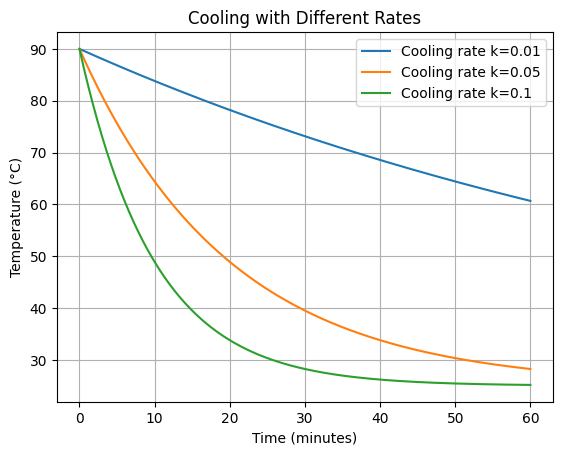

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi pendinginan berdasarkan hukum Newton
def cooling(temp_initial, temp_env, k, time):
    return temp_env + (temp_initial - temp_env) * np.exp(-k * time)

# Parameter
T_initial = 90  # suhu awal
T_env = 25      # suhu lingkungan
time = np.linspace(0, 60, 300)  # waktu dalam menit

# Bandingkan dengan beberapa laju pendinginan
cooling_rates = [0.01, 0.05, 0.1]

plt.figure()
for k in cooling_rates:
    T = cooling(T_initial, T_env, k, time)
    plt.plot(time, T, label=f'Cooling rate k={k}')
    
plt.title('Cooling with Different Rates')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


# 2. Simulate heating instead of cooling (modify differential equation).


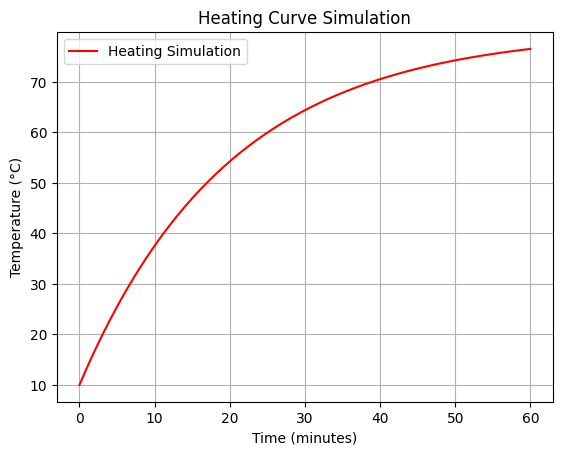

In [6]:
def heating(temp_initial, temp_env, k, time):
    return temp_env - (temp_env - temp_initial) * np.exp(-k * time)

# Simulasi pemanasan dari suhu rendah
T_initial = 10   # suhu awal
T_env = 80       # suhu pemanas
k = 0.05
time = np.linspace(0, 60, 300)

T = heating(T_initial, T_env, k, time)

plt.figure()
plt.plot(time, T, label='Heating Simulation', color='red')
plt.title('Heating Curve Simulation')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


# 3. Use a real-world dataset from Kaggle (e.g., weather data) to simulate continuous temperature changes

C:\Users\User\AppData\Local\Temp\ipykernel_13388\653105760.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


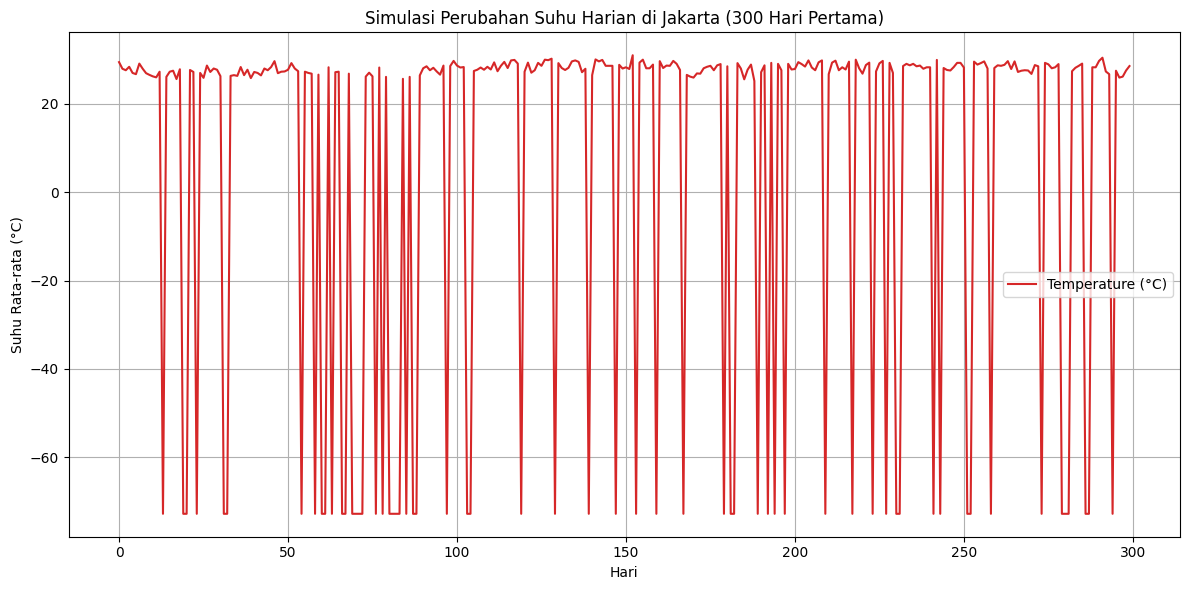

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Load the uploaded dataset
file_path = "city_temperature.csv"
data = pd.read_csv(file_path)

# Filter data untuk kota Jakarta
jakarta_data = data[data['City'] == 'Jakarta'].copy()

# Buat kolom tanggal
jakarta_data['date'] = pd.to_datetime(dict(year=jakarta_data['Year'],
                                           month=jakarta_data['Month'],
                                           day=jakarta_data['Day']), errors='coerce')

# Drop baris dengan tanggal atau suhu yang tidak valid
jakarta_data = jakarta_data.dropna(subset=['date', 'AvgTemperature'])

# Konversi suhu dari Fahrenheit ke Celsius
jakarta_data['Temp_C'] = (jakarta_data['AvgTemperature'] - 32) * 5/9

# Ambil 300 data pertama setelah dibersihkan
jakarta_data_sorted = jakarta_data.sort_values('date').head(300)

# Plot perubahan suhu
time = np.arange(len(jakarta_data_sorted))
temperature = jakarta_data_sorted['Temp_C'].values

plt.figure(figsize=(12, 6))
plt.plot(time, temperature, label='Temperature (°C)', color='tab:red')
plt.title('Simulasi Perubahan Suhu Harian di Jakarta (300 Hari Pertama)')
plt.xlabel('Hari')
plt.ylabel('Suhu Rata-rata (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 4. Compare CES vs. DES for similar systems

C:\Users\User\AppData\Local\Temp\ipykernel_13388\2819141176.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('city_temperature.csv')


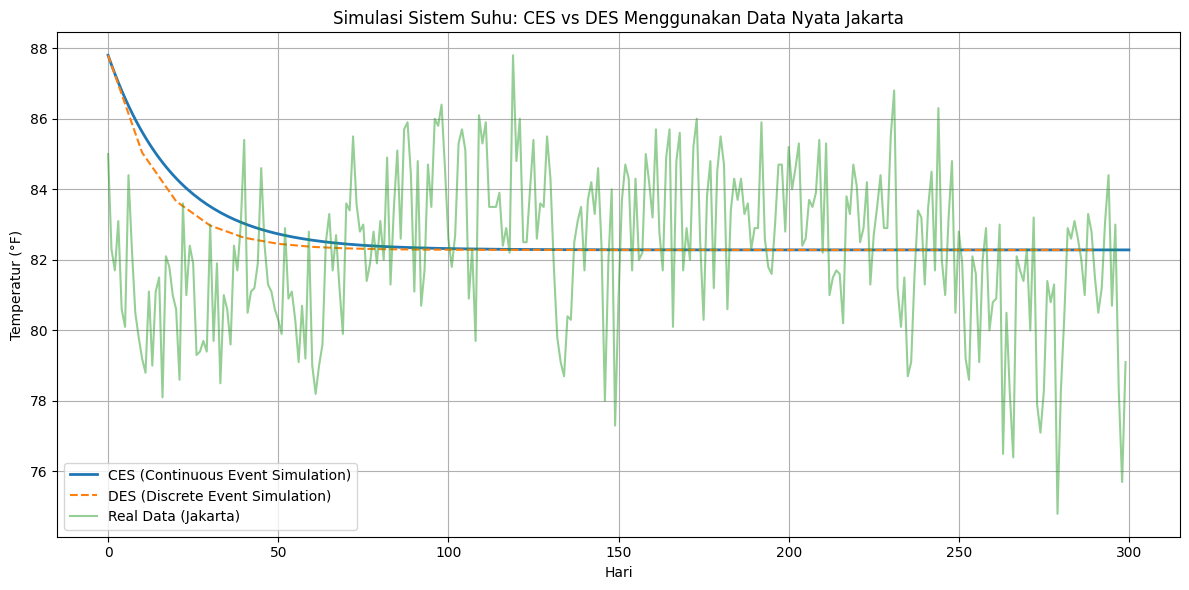

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load dan siapkan data Jakarta
data = pd.read_csv('city_temperature.csv')

# Filter data Jakarta
jakarta = data[(data['City'] == 'Jakarta') & (data['Country'] == 'Indonesia')]
jakarta = jakarta[jakarta['AvgTemperature'] != -99]  # hapus data tidak valid

# Ambil 300 data pertama yang valid
jakarta_temp = jakarta['AvgTemperature'].head(300).values
time = np.arange(len(jakarta_temp))

# Tentukan parameter dari data nyata
T_env = np.mean(jakarta_temp)         # suhu lingkungan rata-rata
T0 = np.max(jakarta_temp)             # suhu awal tinggi (kondisi ekstrem)
k = 0.05                               # konstanta laju perubahan suhu
total_time = 300                       # jumlah hari (waktu total)
dt = 10                                 # waktu diskrit per langkah

# --- CES Simulation ---
def ces_simulation(t, T0, k, T_env):
    return T_env + (T0 - T_env) * np.exp(-k * t)

t_ces = np.linspace(0, total_time, total_time)
T_ces = ces_simulation(t_ces, T0, k, T_env)

# --- DES Simulation ---
def des_simulation(T0, T_env, k, dt, total_time):
    times = np.arange(0, total_time, dt)
    T = [T0]
    for _ in times[1:]:
        T_new = T[-1] - k * (T[-1] - T_env) * dt
        T.append(T_new)
    return times, T

t_des, T_des = des_simulation(T0, T_env, k, dt, total_time)

# --- Visualisasi ---
plt.figure(figsize=(12, 6))
plt.plot(t_ces, T_ces, label='CES (Continuous Event Simulation)', linewidth=2)
plt.plot(t_des, T_des, label='DES (Discrete Event Simulation)', linestyle='--')
plt.plot(time, jakarta_temp, label='Real Data (Jakarta)', alpha=0.5)
plt.title('Simulasi Sistem Suhu: CES vs DES Menggunakan Data Nyata Jakarta')
plt.xlabel('Hari')
plt.ylabel('Temperatur (°F)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
